In [132]:
import ptitprince as pt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
from sklearn.metrics import roc_auc_score
from scipy.stats import pearsonr, f_oneway, tukey_hsd

#### (Test) All Categories

In [118]:
data = pd.read_csv('topics-post-RADAR-data.csv')

columns_to_keep = ['STUD_REFORMATTED', 'STUD_RED_RADAR','STUD_ALL_RADAR', 'GPT3_RADAR', 'GPT4_RADAR', 'GPT4_Quillbot_RADAR',
                   'GPT4_Grammarly_RADAR', 'GPT4_WordAI_RADAR','GPT4_Paraphrasing_IO_RAW_RADAR', 'GPT4_Paraphrasing_IO_EDITED_RADAR']

melted_data = data[columns_to_keep]

melted_data = pd.melt(melted_data, var_name='Category', value_name='RADAR_output')

<Axes: xlabel='RADAR_output', ylabel='Category'>

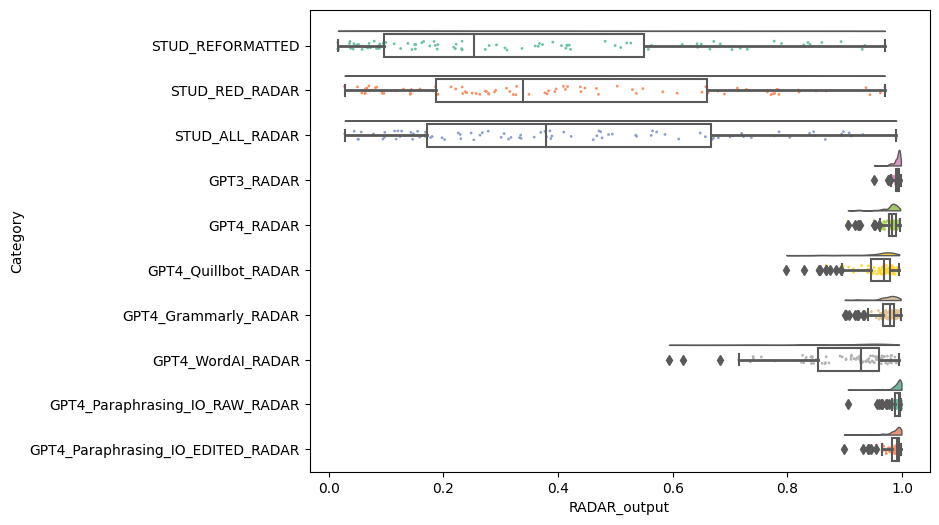

In [119]:
f, ax = plt.subplots(figsize=(8, 6))
pt.RainCloud(data = melted_data, x = 'Category', y = 'RADAR_output', ax = ax, orient='h', point_size=2, width_box=0.5)

<Axes: xlabel='Category', ylabel='RADAR_output'>

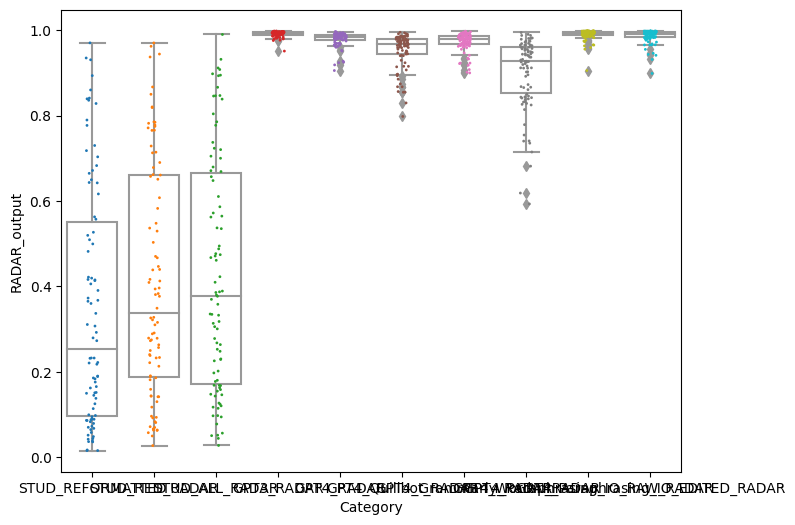

In [120]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(data=melted_data, x = 'Category', y = 'RADAR_output', size=2)
sns.boxplot(data=melted_data, x = 'Category', y = 'RADAR_output', color='White')

#### Raw HWT vs MGTs

[[Text(0, 0, 'Human'), Text(1, 0, 'GPT3'), Text(2, 0, 'GPT4')]]

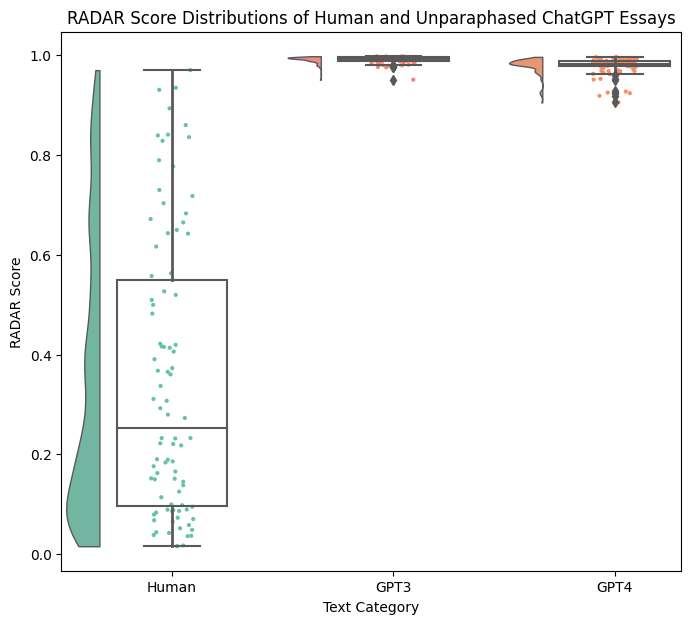

In [121]:
data = pd.read_csv('topics-post-RADAR-data.csv')
columns_to_keep = ['STUD_REFORMATTED', 'GPT3_RADAR', 'GPT4_RADAR']
melted_data = data[columns_to_keep]
melted_data = pd.melt(melted_data, var_name='Category', value_name='RADAR_output')
f, ax = plt.subplots(figsize=(8, 7))
custom_colors = {'STUD_REFORMATTED': '#66c2a5', 'GPT3_RADAR': '#fb8072', 'GPT4_RADAR': '#fc8d62'}
g = pt.RainCloud(data = melted_data, x = 'Category', y = 'RADAR_output', ax = ax, orient='v', point_size=3, 
             width_box= .5, width_viol= .3, scale='count', palette=custom_colors)
plt.xlabel('Text Category')
plt.ylabel('RADAR Score')
plt.title('RADAR Score Distributions of Human and Unparaphased ChatGPT Essays')
g.set(xticklabels=['Human','GPT3', 'GPT4'])

#### Paraphrased MGTs

(0.0, 1.0)

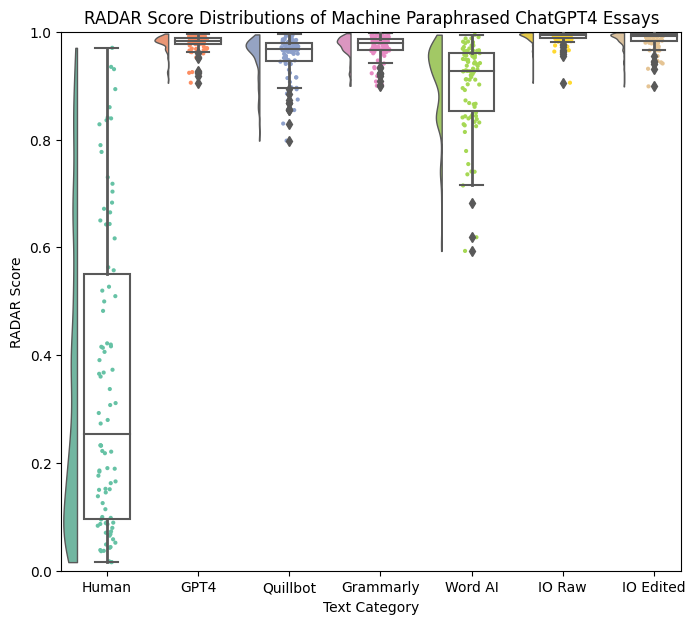

In [122]:
data = pd.read_csv('topics-post-RADAR-data.csv')
columns_to_keep = ['STUD_REFORMATTED','GPT4_RADAR', 'GPT4_Quillbot_RADAR','GPT4_Grammarly_RADAR', 'GPT4_WordAI_RADAR',
                   'GPT4_Paraphrasing_IO_RAW_RADAR', 'GPT4_Paraphrasing_IO_EDITED_RADAR']
melted_data = data[columns_to_keep]
melted_data = pd.melt(melted_data, var_name='Category', value_name='RADAR_output')
f, ax = plt.subplots(figsize=(8, 7))
g = pt.RainCloud(data = melted_data, x = 'Category', y = 'RADAR_output', ax = ax, orient='v', point_size=3, 
             width_box= .5, width_viol= .3, scale='count')
plt.xlabel('Text Category')
plt.ylabel('RADAR Score')
plt.title('RADAR Score Distributions of Machine Paraphrased ChatGPT4 Essays')
g.set(xticklabels=['Human','GPT4', 'Quillbot', 'Grammarly', 'Word AI', 'IO Raw', 'IO Edited'])
plt.ylim(0,1)

#### Paraphrased HWT

(0.0, 1.0)

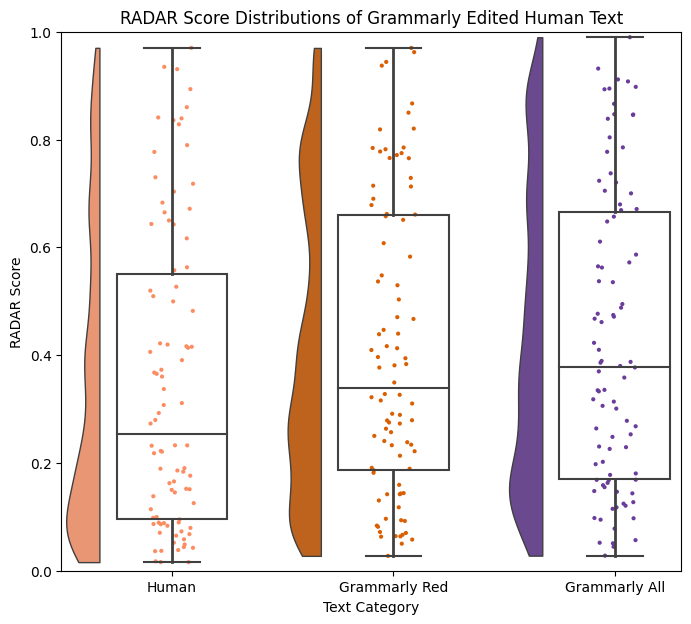

In [123]:
data = pd.read_csv('topics-post-RADAR-data.csv')
columns_to_keep = ['STUD_REFORMATTED','STUD_RED_RADAR','STUD_ALL_RADAR']
melted_data = data[columns_to_keep]
melted_data = pd.melt(melted_data, var_name='Category', value_name='RADAR_output')
f, ax = plt.subplots(figsize=(8, 7))

custom_colors = {'STUD_REFORMATTED': '#fc8d62', 'STUD_RED_RADAR': '#d95f02', 'STUD_ALL_RADAR': '#6a3d9a'}

g = pt.RainCloud(data = melted_data, x = 'Category', y = 'RADAR_output', ax = ax, orient='v', point_size=3, 
             width_box= .5, width_viol= .3, scale='count', palette=custom_colors)
plt.xlabel('Text Category')
plt.ylabel('RADAR Score')
plt.title('RADAR Score Distributions of Grammarly Edited Human Text')
g.set(xticklabels=['Human','Grammarly Red', 'Grammarly All'])
plt.ylim(0,1)

#### Is there an optimal RADAR cut-off?

In [124]:
data = pd.read_csv('topics-post-RADAR-data.csv')
test = {
    'RADAR_threshold' : [x / 100 for x in range(101)],
    'HWT_FP' : [(data['STUD_REFORMATTED'] > (x / 100)).sum() / 90 * 100 for x in range(101)],
    'GPT4_FN' : [(data['GPT4_RADAR'] < (x / 100)).sum() / 90 * 100 for x in range(101)],
    'GPT3_FN' : [(data['GPT3_RADAR'] < (x / 100)).sum() / 90 * 100 for x in range(101)],
    'WordAI_FN' : [(data['GPT4_WordAI_RADAR'] < (x / 100)).sum() / 90 * 100 for x in range(101)],
    'Quillbot_FN': [(data['GPT4_Quillbot_RADAR'] < (x / 100)).sum() / 90 * 100 for x in range(101)]
}

df = pd.DataFrame(test)
melted = pd.melt(df, id_vars=['RADAR_threshold'])

In [125]:
df.tail(11)

,RADAR_threshold,HWT_FP,GPT4_FN,GPT3_FN,WordAI_FN,Quillbot_FN
90,0.90,3.333333,0.000000,0.000000,33.333333,13.333333
91,0.91,3.333333,1.111111,0.000000,35.555556,14.444444
92,0.92,3.333333,2.222222,0.000000,42.222222,17.777778
93,0.93,3.333333,5.555556,0.000000,51.111111,20.000000
94,0.94,1.111111,5.555556,0.000000,56.666667,20.000000
95,0.95,1.111111,5.555556,0.000000,65.555556,28.888889
96,0.96,1.111111,8.888889,1.111111,73.333333,35.555556
97,0.97,1.111111,20.000000,1.111111,85.555556,53.333333
98,0.98,0.000000,31.111111,6.666667,91.111111,77.777778
99,0.99,0.000000,83.333333,31.111111,97.777778,94.444444


(0.0, 100.0)

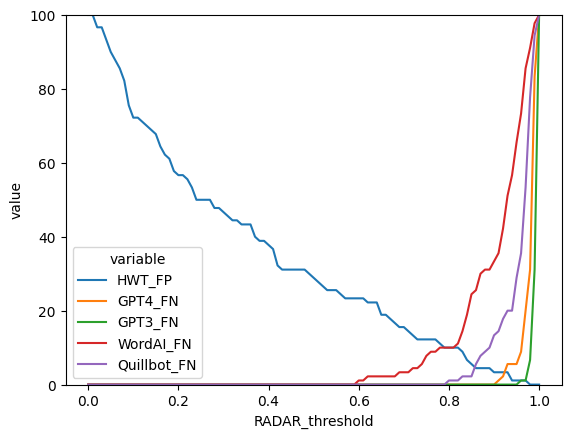

In [126]:
sns.lineplot(data=melted, x='RADAR_threshold', y = 'value', hue='variable')
plt.ylim(0,100)

#### Weber Wulff Comparison

Text(0.5, 1.0, 'RADAR Accuracy for All Text Categories Using Weber-Wulff et al. (2023) Formulas')

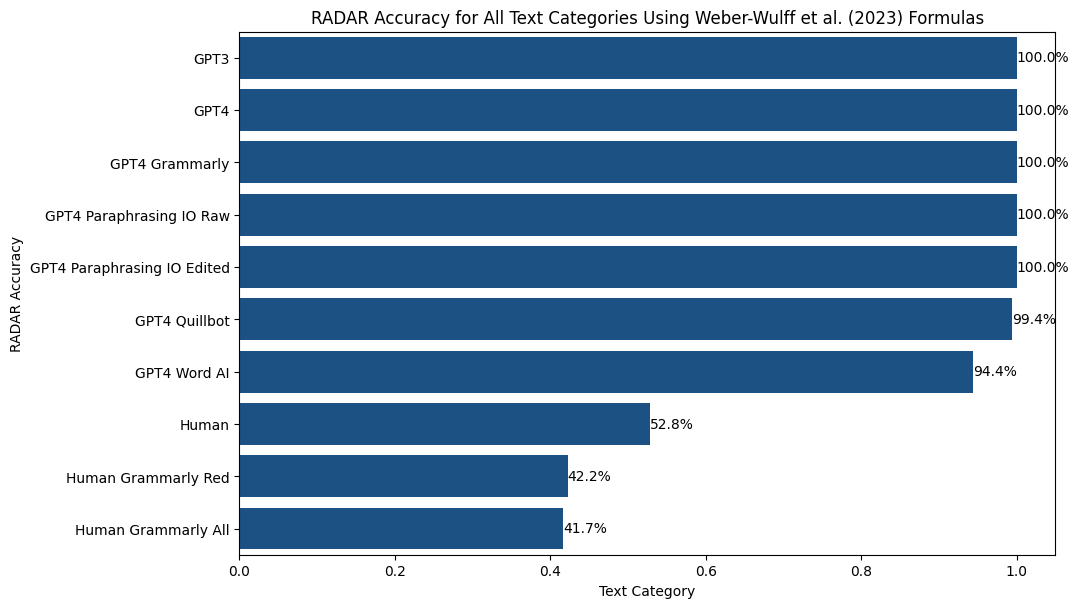

In [127]:
data = pd.read_csv('topics-post-RADAR-data.csv')

HWT_categories = ['STUD_REFORMATTED','STUD_RED_RADAR','STUD_ALL_RADAR']
MGT_categories = ['GPT3_RADAR', 'GPT4_RADAR', 'GPT4_Quillbot_RADAR','GPT4_Grammarly_RADAR', 
                  'GPT4_WordAI_RADAR','GPT4_Paraphrasing_IO_RAW_RADAR', 'GPT4_Paraphrasing_IO_EDITED_RADAR']

accuracies = {}

for paraphraser in MGT_categories:
    scores = data[paraphraser]
    acc_1 = (scores > 0.8).sum() / 90 * 100
    acc_2 = (scores > 0.6).sum() / 90 * 100 
    acc_3 = ((scores > 0.8).sum() +  0.5 * ((scores > 0.6).sum() - (scores > 0.8).sum())) / 90 * 100
    result = (acc_1 + acc_2 + acc_3) / 300
    accuracies[paraphraser] = result

for paraphraser in HWT_categories:
    scores = data[paraphraser]
    acc_1 = (scores < 0.2).sum() / 90 * 100
    acc_2 = (scores < 0.4).sum() / 90 * 100 
    acc_3 = ((scores < 0.2).sum() +  0.5 * ((scores < 0.4).sum() - (scores < 0.2).sum())) / 90 * 100
    result = (acc_1 + acc_2 + acc_3) / 300
    accuracies[paraphraser] = result

accuracies = dict(sorted(accuracies.items(), key=lambda x:x[1], reverse=True))
x = list(accuracies.values())
y = list(accuracies.keys())
ax = sns.barplot(data=None, x=x, y=y, color='#0b5394')
for i in ax.containers:
    ax.bar_label(i, fmt='{:.1%}')
plt.subplots_adjust(top=1.2, right=1.4)
plt.xlabel('Text Category')
plt.ylabel('RADAR Accuracy')
ax.set_yticklabels(['GPT3','GPT4','GPT4 Grammarly','GPT4 Paraphrasing IO Raw', 'GPT4 Paraphrasing IO Edited', 
                    'GPT4 Quillbot', 'GPT4 Word AI', 'Human', 'Human Grammarly Red',
                    'Human Grammarly All'])
plt.title('RADAR Accuracy for All Text Categories Using Weber-Wulff et al. (2023) Formulas')


#### Text Length vs RADAR

In [174]:
pal = sns.color_palette('husl', n_colors=11)
print(pal.as_hex())

['#f77189', '#e18632', '#b59a32', '#8ba731', '#32b258', '#35ae95', '#37abb2', '#39a7d6', '#8f93f4', '#db70f4', '#f667c6']


Text(0, 0.5, 'RADAR Output')

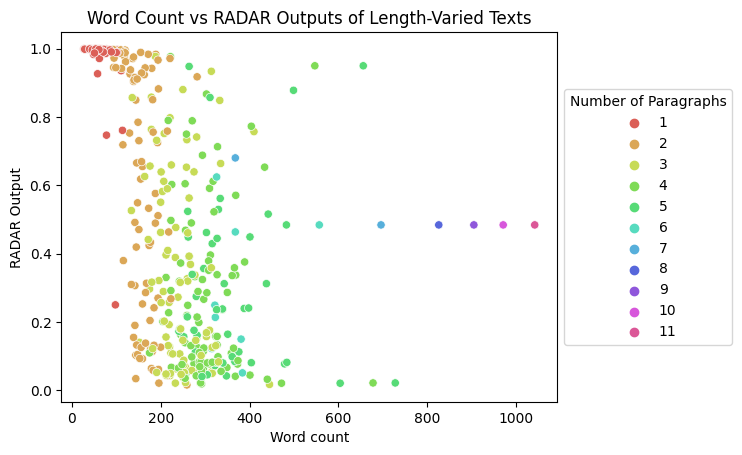

In [178]:
text_length_data = pd.read_csv('topics-length-specific-RADAR.csv')
text_length_data['paragraph_id'] += 1

colors = ['#db5f57', '#dba757', '#c7db57', '#7fdb57', '#57db77', '#57dbbf', '#57afdb', '#5767db', '#8f57db', '#d757db', '#db5797']

sns.scatterplot(data=text_length_data, 
                x=text_length_data['word_count'], 
                y=text_length_data['RADAR_outputs'], 
                hue=text_length_data['paragraph_id'],
                palette=colors)

# Move the legend to a new location
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Number of Paragraphs')
plt.title('Word Count vs RADAR Outputs of Length-Varied Texts')
plt.xlabel('Word count')
plt.ylabel('RADAR Output')

#### AUROC

In [130]:
categories = ['STUD_REFORMATTED', 'STUD_RED_RADAR','STUD_ALL_RADAR',
              'GPT3_RADAR', 'GPT4_RADAR', 'GPT4_Quillbot_RADAR','GPT4_Grammarly_RADAR', 
                'GPT4_WordAI_RADAR','GPT4_Paraphrasing_IO_RAW_RADAR', 'GPT4_Paraphrasing_IO_EDITED_RADAR'] 

# Example data
n = 3 # number of human data categories
y_true = [0] * n * 90 + [1] * (len(categories) - n) * 90  # True labels
y_score = []

for category in categories:
    y_score = y_score + (list(data[category]))

# Calculate AUROC
auroc_score = roc_auc_score(y_true, y_score)
print("AUROC Score:", auroc_score)

AUROC Score: 0.9876543209876543


#### Stats Tests

In [139]:
# Perform ANOVA
print(f_oneway(data['STUD_REFORMATTED'], data['GPT3_RADAR'],  data['GPT4_RADAR']))

print(f_oneway( data['GPT4_RADAR'],  data['GPT4_Paraphrasing_IO_RAW_RADAR'],data['GPT4_Paraphrasing_IO_EDITED_RADAR'],  data['GPT4_Quillbot_RADAR'],
               data['GPT4_Grammarly_RADAR'],  data['GPT4_WordAI_RADAR']))

print(f_oneway(data['STUD_REFORMATTED'], data['STUD_RED_RADAR'], data['STUD_ALL_RADAR']))

F_onewayResult(statistic=468.78647043619145, pvalue=4.4466620991013023e-88)
F_onewayResult(statistic=59.58278661051088, pvalue=2.799784212584618e-49)
F_onewayResult(statistic=2.07422555725064, pvalue=0.12767380764854336)


In [153]:
# Perform Follow Up Tukey Tests
res = tukey_hsd(data['STUD_REFORMATTED'], data['GPT3_RADAR'],  data['GPT4_RADAR'])
print(res)

stats = pd.DataFrame(res.statistic)
pvalues = pd.DataFrame(res.pvalue)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.644     0.000    -0.701    -0.588
 (0 - 2)     -0.632     0.000    -0.689    -0.575
 (1 - 0)      0.644     0.000     0.588     0.701
 (1 - 2)      0.012     0.864    -0.044     0.069
 (2 - 0)      0.632     0.000     0.575     0.689
 (2 - 1)     -0.012     0.864    -0.069     0.044



In [154]:
pvalues

,0,1,2
0,1.0,0.000000,0.000000
1,0.0,1.000000,0.863935
2,0.0,0.863935,1.000000


In [150]:
# Perform Follow Up Tukey Tests
res = tukey_hsd(data['GPT4_RADAR'], data['GPT4_Quillbot_RADAR'], data['GPT4_WordAI_RADAR'], data['GPT4_Grammarly_RADAR'],  
                data['GPT4_Paraphrasing_IO_RAW_RADAR'],data['GPT4_Paraphrasing_IO_EDITED_RADAR'])
print(res)

stats = pd.DataFrame(res.statistic)
pvalues = pd.DataFrame(res.pvalue)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.025     0.000     0.008     0.043
 (0 - 2)      0.077     0.000     0.060     0.094
 (0 - 3)      0.006     0.894    -0.011     0.024
 (0 - 4)     -0.011     0.458    -0.028     0.006
 (0 - 5)     -0.007     0.873    -0.024     0.010
 (1 - 0)     -0.025     0.000    -0.043    -0.008
 (1 - 2)      0.052     0.000     0.034     0.069
 (1 - 3)     -0.019     0.020    -0.036    -0.002
 (1 - 4)     -0.036     0.000    -0.054    -0.019
 (1 - 5)     -0.032     0.000    -0.049    -0.015
 (2 - 0)     -0.077     0.000    -0.094    -0.060
 (2 - 1)     -0.052     0.000    -0.069    -0.034
 (2 - 3)     -0.071     0.000    -0.088    -0.053
 (2 - 4)     -0.088     0.000    -0.105    -0.071
 (2 - 5)     -0.084     0.000    -0.101    -0.066
 (3 - 0)     -0.006     0.894    -0.024     0.011
 (3 - 1)      0.019     0.020     0.002     0.036
 (3 - 2)      0.071     0.000   